## Estimating the bicycle architecture capabilities using random circuits

In [1]:
import os
os.chdir('..')
from analyze import read_numerics
from analyze import process_random_numerics, compute_means, plot_means
from analyze import run_random_numerics, generate_measurement_tables, compile_crates

In this notebook, we compute and plot the circuit failure probability for random circuits.

This notebook follows closely the random circuit experiment presented in [_Tour de gross ..._ arxiv:2506.03094](https://arxiv.org/abs/2506.03094). In particular, see Figure 10 on page 29 ([online html](https://ar5iv.labs.arxiv.org/html/2506.03094#S4.F12.sf1)), and Figure 17 on page 66 ([online html](https://ar5iv.labs.arxiv.org/html/2506.03094#A1.F19)).
You'll find docstrings and comments explaining the functions called here in files in the top-level folder `./analyze`.

## Generating measurement tables

Ensure that compiled crates are up to date:

In [2]:
compile_crates()

   Compiling proc-macro2 v1.0.95
   Compiling unicode-ident v1.0.18
   Compiling autocfg v1.4.0
   Compiling memchr v2.7.5
   Compiling serde v1.0.219
   Compiling cfg-if v1.0.1
   Compiling libc v0.2.173
   Compiling bytemuck v1.23.1
   Compiling getrandom v0.3.3
   Compiling zerocopy v0.8.25
   Compiling utf8parse v0.2.2
   Compiling anstyle-query v1.1.3
   Compiling regex-syntax v0.8.5
   Compiling paste v1.0.15
   Compiling colorchoice v1.0.4
   Compiling anstyle v1.0.11
   Compiling is_terminal_polyfill v1.70.1
   Compiling anstyle-parse v0.2.7
   Compiling typenum v1.18.0
   Compiling clap_lex v0.7.5
   Compiling log v0.4.27
   Compiling heck v0.5.0
   Compiling anstream v0.6.19
   Compiling safe_arch v0.7.4
   Compiling rawpointer v0.2.1
   Compiling strsim v0.11.1
   Compiling jiff v0.2.14
   Compiling az v1.2.1
   Compiling itoa v1.0.15
   Compiling ryu v1.0.20
   Compiling num-traits v0.2.19
   Compiling matrixmultiply v0.3.10
   Compiling serde_json v1.0.140
   Compiling cla

Ensure that the measurement tables have been constructed:

In [3]:
%time generate_measurement_tables()

CPU times: user 0 ns, sys: 1.81 ms, total: 1.81 ms
Wall time: 71.4 ms


## Generating and analyzing random circuits

Generate random circuits, compile them, collect some statistics, write the result to csv files, and collate these files. But only do this if the output file does not already exist.

In [4]:
%time run_random_numerics(overwrite=False, verbose=True)

./data/random_numerics_output.csv exists. Will not overwrite
CPU times: user 37 μs, sys: 1.88 ms, total: 1.92 ms
Wall time: 51.4 ms


## Circuit failure probability

In [5]:
%time data = read_numerics("./data/random_numerics_output.csv")

CPU times: user 20.7 s, sys: 1.83 s, total: 22.5 s
Wall time: 22.6 s


The data in `data` consists of eight trials for each of six sets of input parameters. Each set of parameters defines a data set. We partition the data by dataset.

In [6]:
grouped_data = process_random_numerics(data)

104 lines in data set (code=gross, p=0.001, q=5)
800000 lines in data set (code=two-gross, p=0.001, q=50)
800000 lines in data set (code=gross, p=0.0001, q=5)
296478 lines in data set (code=gross, p=0.0001, q=50)
800000 lines in data set (code=two-gross, p=0.0001, q=50)
800000 lines in data set (code=two-gross, p=0.0001, q=500)


Here are the labels on the columns written by `random_numerics`. They are the same for all data sets.

In [7]:
list(grouped_data[('two-gross', 0.001, 50)].keys())

['code',
 'p',
 'i',
 'qubits',
 't_injs',
 'automorphisms',
 'measurements',
 'joint_measurements',
 'measurement_depth',
 'end_time',
 'total_error',
 'mean_error']

In this notebook, we are interested only in 'total_error'. We will compute the mean of this error across the eight trials. Then we will plot the result as a function of the number of logical T gates. Each input instruction in the random circuits is a Pauli-generated rotation with angle $\pi/4$. Upon compilation, each input instruction results, in general, in several ISA instructions of the types in the list above. But each instruction produces only a single T gate. For the coordinate axis, we use the index of the instruction, because for these random circuits, this is the same as the cumulative number of T-gates.

The result of the computation of the means will be written directly into the dict for each data set. This adds a key called "mean_error" to the list above.

In [8]:
compute_means(grouped_data)

Here we plot the mean for each data set.

Compare this plot to Figure 17 on page 66 of [_Tour de gross ..._ arxiv:2506.03094](https://arxiv.org/abs/2506.03094)

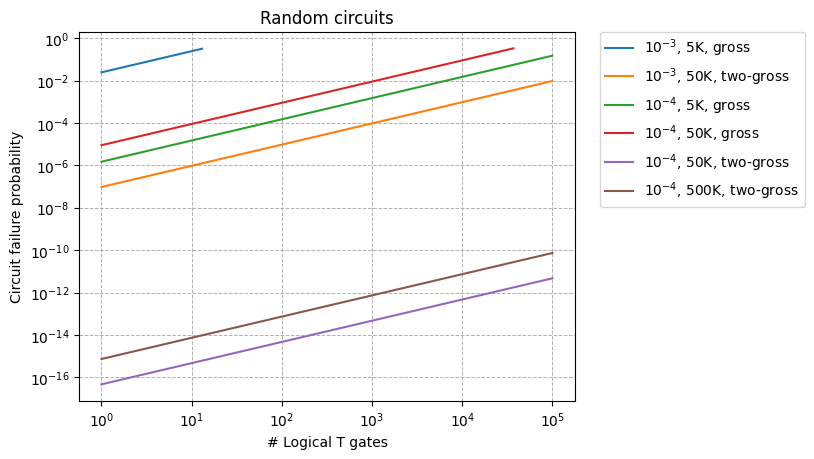

In [9]:
plot_means(grouped_data)